In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from preprocessing.prepro import ambiguity_score, regular_bases_count, ambiguous_bases_count

%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_parquet('data/dataset.parquet')
df.drop(columns=["strain", "date", "date_submitted"], inplace=True)

In [4]:
bases_counts = Counter(''.join(df['sequence'].astype(str).values))
bases_counts

Counter({'T': 3501307,
         'A': 3247677,
         'G': 2134257,
         'C': 1993643,
         'N': 16279,
         'Y': 349,
         'R': 173,
         'K': 67,
         'S': 38,
         'W': 29,
         'M': 18})

In [5]:
df['ambiguous_bases_count'] = df['sequence'].apply(ambiguous_bases_count)
df['bases_count'] = df['sequence'].apply(regular_bases_count)
df['ambiguity_score'] = df['sequence'].apply(ambiguity_score)
df['length'] = df['sequence'].apply(len)

# df = df.sort_values(by='ambiguity_score', ascending=False)

In [6]:
df.describe()

,ambiguous_bases_count,bases_count,ambiguity_score,length
count,368.000000,368.000000,368.000000,368.000000
mean,46.067935,29556.750000,6.450311,29602.817935
std,74.802944,189.758106,10.685634,194.488982
min,0.000000,28939.000000,0.000000,28939.000000
25%,0.000000,29416.000000,0.000000,29449.500000
50%,6.000000,29642.000000,0.678571,29691.000000
75%,51.250000,29701.000000,6.714286,29701.250000
max,422.000000,29843.000000,60.285714,29876.000000


In [7]:
def plot_hist(column, bins=100, title="", xlabel="", ylabel=""):
    fig, ax = plt.subplots()
    ax.hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(title);
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

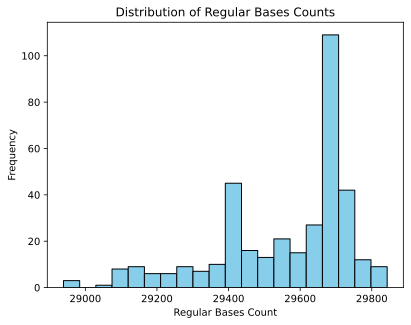

In [8]:
# Plot the distribution of regular bases counts
plot_hist(
    'bases_count', 
    bins=20,
    title='Distribution of Regular Bases Counts', 
    xlabel='Regular Bases Count', 
    ylabel='Frequency'
)

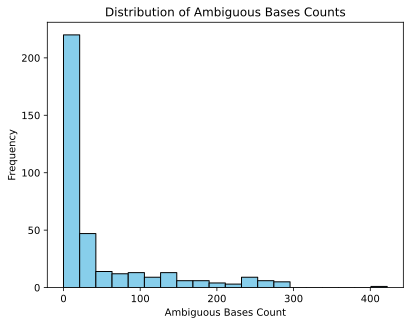

In [9]:
# Plot the distribution of ambiguous bases counts
plot_hist(
    'ambiguous_bases_count', 
    bins=20,
    title='Distribution of Ambiguous Bases Counts', 
    xlabel='Ambiguous Bases Count', 
    ylabel='Frequency'
)

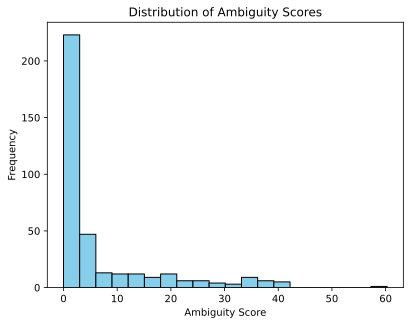

In [10]:
# Plot the distribution of ambiguity scores
plot_hist(
    'ambiguity_score', 
    bins=20,
    title='Distribution of Ambiguity Scores', 
    xlabel='Ambiguity Score', 
    ylabel='Frequency'

)

In [11]:
# Filter out sequences with ambiguity score <= 0.1
df_filtered = df[df['ambiguity_score'] <= 0.1]
df_filtered.describe()

,ambiguous_bases_count,bases_count,ambiguity_score,length
count,126.000000,126.000000,126.000000,126.000000
mean,0.119048,29543.000000,0.008503,29543.119048
std,0.325137,239.046104,0.023224,239.055093
min,0.000000,28939.000000,0.000000,28939.000000
25%,0.000000,29341.250000,0.000000,29341.250000
50%,0.000000,29665.000000,0.000000,29665.000000
75%,0.000000,29701.000000,0.000000,29701.000000
max,1.000000,29804.000000,0.071429,29804.000000


In [12]:
def plot_base_frequency(sequences):
    bases = ['A', 'C', 'G', 'T', 'N', 'Y', 'R', 'W', 'S', 'K', 'M', 'B', 'D', 'H', 'V']
    base_counts = {base: 0 for base in bases}
    for seq in sequences:
        for base in seq.upper():
            if base in base_counts:
                base_counts[base] += 1

    total_bases = sum(base_counts.values())

    base_freqs = {base: count / total_bases for base, count in base_counts.items()}

    # Extract labels and data for plotting
    base_labels = list(base_freqs.keys())
    base_data = list(base_freqs.values())

    fig, ax = plt.subplots()
    ax.bar(base_labels, base_data, color='skyblue', edgecolor='black')
    ax.set_title("Frequency of Each Base");
    ax.set_xlabel("Base");
    ax.set_ylabel("Frequency");

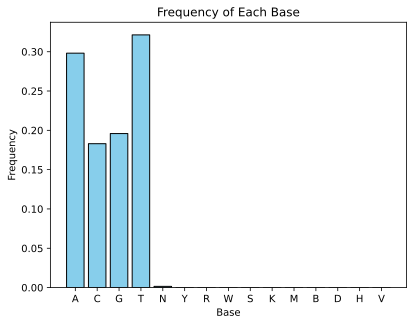

In [13]:
plot_base_frequency(df['sequence'])

In [38]:
def plot_label_distribution(sequences, labels):
    if len(sequences) != len(labels):
        raise ValueError("Number of sequences and labels must be equal.")

    # Count the occurrences of each label
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

    # Extract labels and data for plotting
    label_names = list(label_counts.keys())
    label_data = list(label_counts.values())

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.bar(label_names, label_data, color='skyblue', edgecolor='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Distribution of Labels");
    ax.set_xlabel("Label");
    ax.set_ylabel("Count");

/var/folders/w9/b9mdbdzs39lby1wt6v087t6w0000gn/T/ipykernel_75785/679745114.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


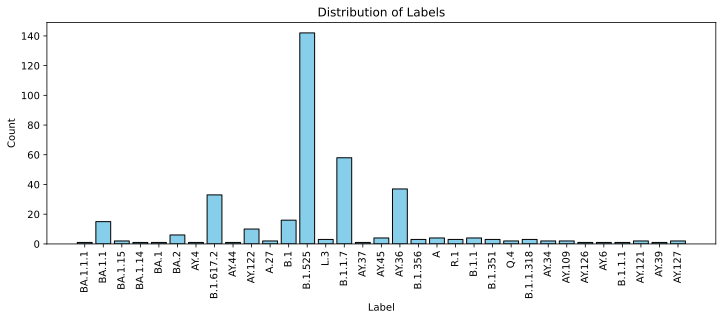

In [39]:
plot_label_distribution(df['sequence'], df['pangolin_lineage'])